#### IMPORTING LIBRARIES

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

## STEP-1 READING AND UNDERSTANDING DATA

In [3]:
#reading the dataset
bikes=pd.read_csv('day.csv')
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#describe data
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
#check shape
bikes.shape

(730, 16)

In [6]:
#checking if there are null values
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
#checking cols
bikes.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

### CLEANING DATA

In [8]:
#Adding days variable
bikes['days'] = (pd.to_datetime(bikes['dteday'],format= '%d-%m-%Y') - pd.to_datetime('01-01-2018',format= '%d-%m-%Y')).dt.days

In [9]:
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,days
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,3
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,4


In [10]:
#dropping
bikes.drop(['instant'],axis=1,inplace=True)

In [11]:
bikes.drop(['dteday'],axis=1,inplace=True)

In [12]:
bikes.drop(['casual'],axis=1,inplace=True)

In [13]:
bikes.drop(['registered'],axis=1,inplace=True)

In [14]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,0
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,1
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,4


In [15]:
#checking nulls
bikes.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
days          0
dtype: int64

##### There are no null values

In [16]:
#checking matrix
bikes.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,0.004012,0.017868,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584,0.413587
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,0.000685,-0.011852,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728,0.866026
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,-0.004059,-0.010414,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191,0.498251
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.020145,-0.257009,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764,0.016275
weekday,4.012478e-03,6.852851e-04,-4.059002e-03,-0.020145,1.000000,0.001588,0.034216,0.044876,0.037964,0.008780,-0.017230,0.036183,-0.001182
workingday,1.786841e-02,-1.185197e-02,-1.041372e-02,-0.257009,0.001588,1.000000,-0.026332,0.002044,0.010657,0.053770,-0.002453,-0.027640,-0.015171
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.034216,-0.026332,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929,-0.021862
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,0.044876,0.002044,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044,0.150738
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,0.037964,0.010657,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685,0.152773
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,0.008780,0.053770,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543,0.016080


## STEP-2 VISUALISING THE DATA

In [17]:
#import library
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
#replacing values
bikes.season.replace({1:'Spring',2:'Summer',3:'Fall',4:'Winter'},inplace=True)
bikes.mnth.replace({1:'Jan',2:'feb',3:'march',4:'april',5:'may',6:'june',7:'july',8:'aug',9:'sept',10:'oct',11:'nov',12:'dec'},inplace=True)
bikes.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace=True)
bikes.weekday.replace({0:'sun',1:'mon',2:'tues',3:'wed',4:'thurs',5:'fri',6:'sat'},inplace=True)

In [19]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days
0,Spring,0,Jan,0,mon,1,moderate,14.110847,18.18125,80.5833,10.749882,985,0
1,Spring,0,Jan,0,tues,1,moderate,14.902598,17.68695,69.6087,16.652113,801,1
2,Spring,0,Jan,0,wed,1,good,8.050924,9.47025,43.7273,16.636703,1349,2
3,Spring,0,Jan,0,thurs,1,good,8.200000,10.60610,59.0435,10.739832,1562,3
4,Spring,0,Jan,0,fri,1,good,9.305237,11.46350,43.6957,12.522300,1600,4


<Figure size 864x1800 with 0 Axes>

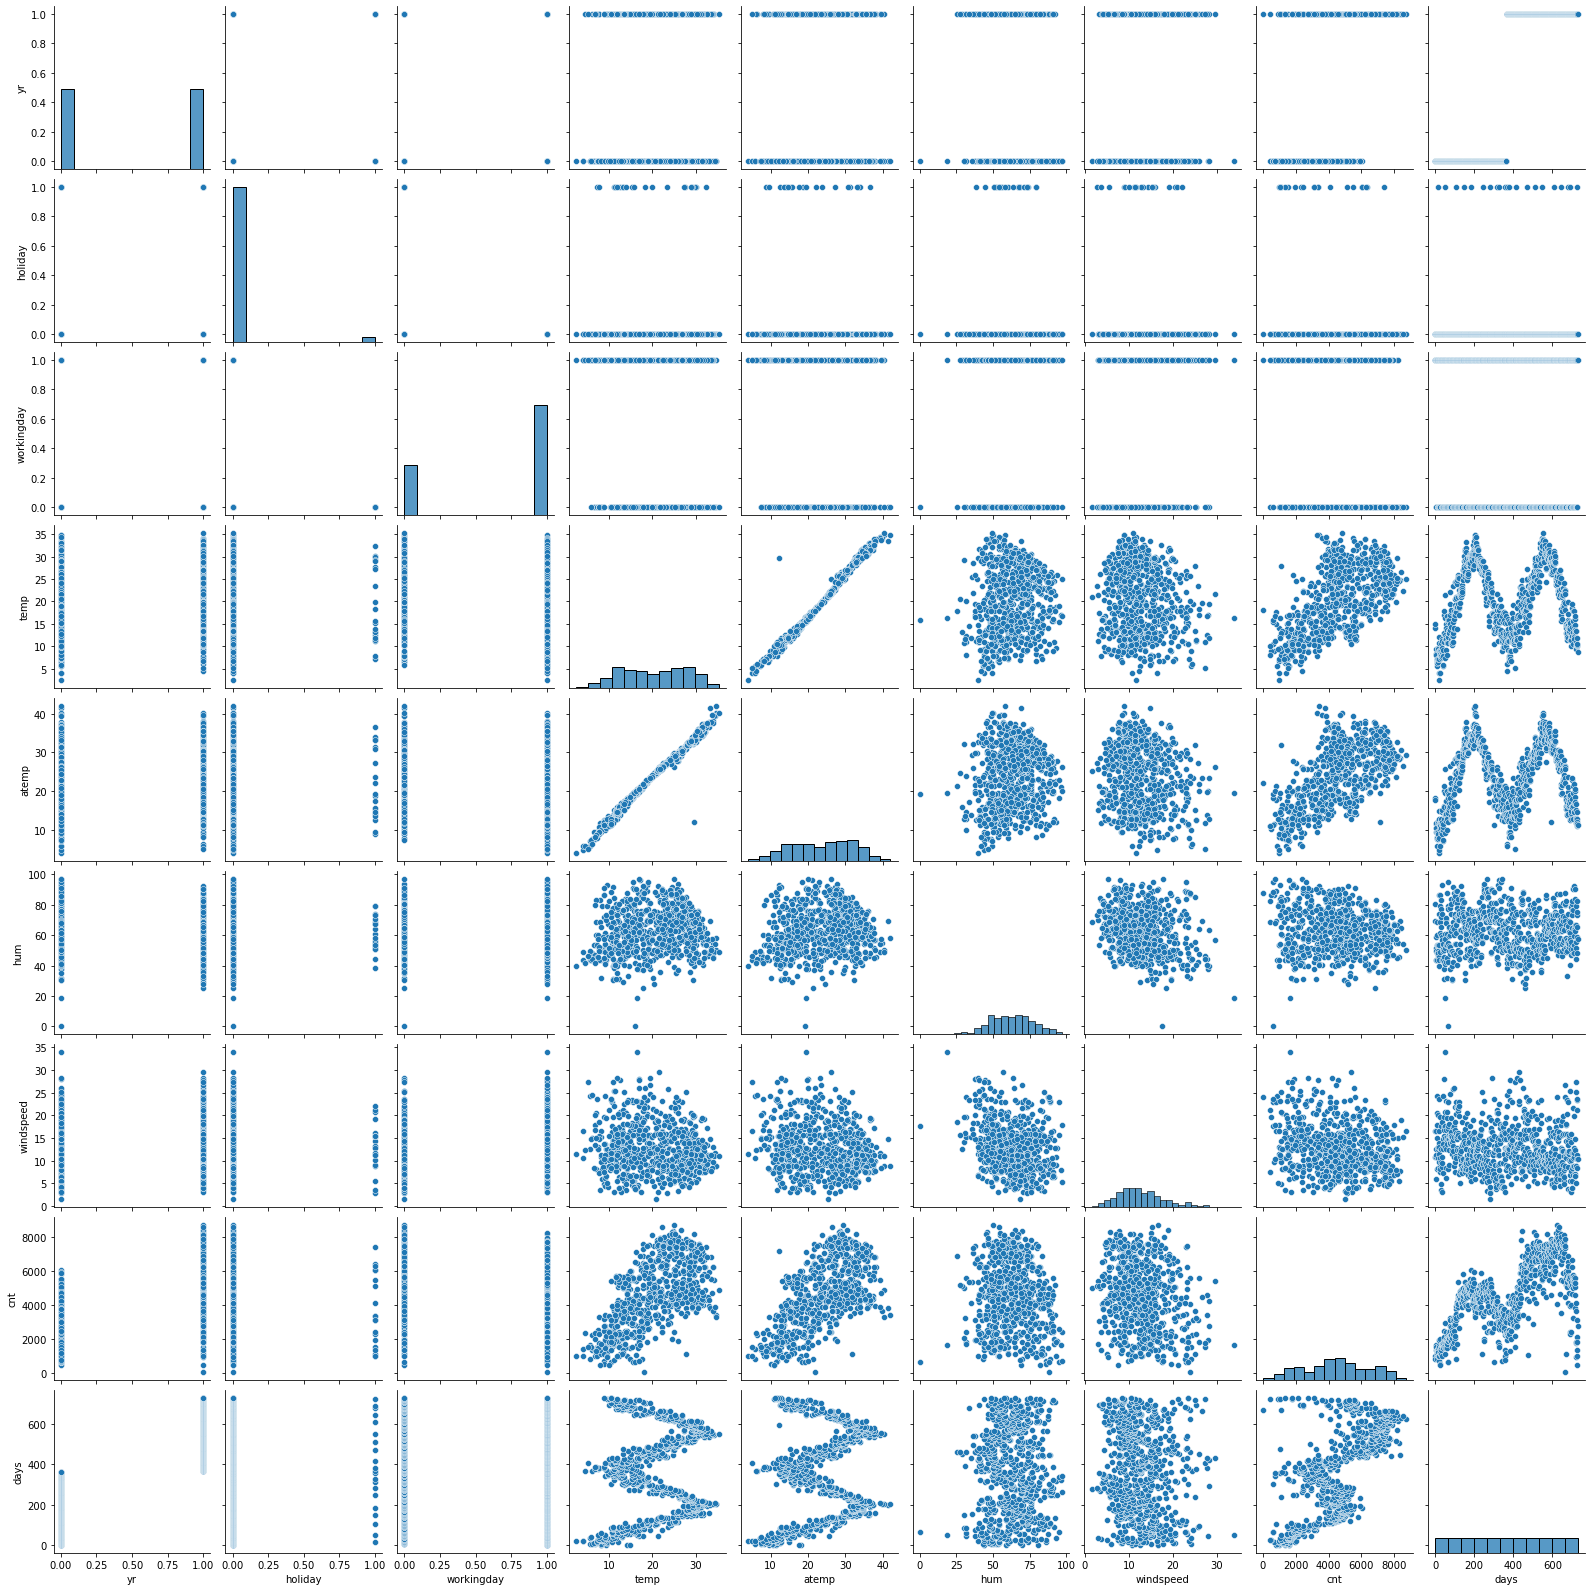

In [20]:
#find numerical vars correlation using pairplots
plt.figure(figsize=(12,25))
sns.pairplot(bikes)
plt.show()

<Figure size 864x1800 with 0 Axes>

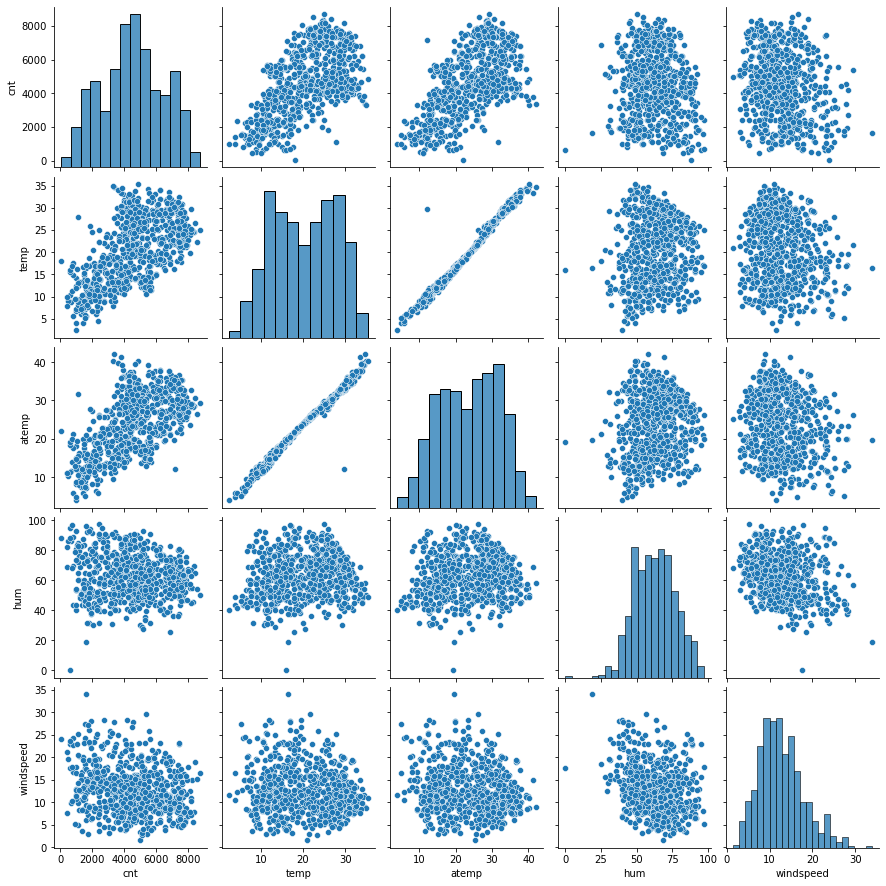

In [21]:
#find continuous numerical vars correlation using pairplots
plt.figure(figsize=(12,25))
sns.pairplot(data=bikes,vars=['cnt','temp','atemp','hum','windspeed'])
plt.show()

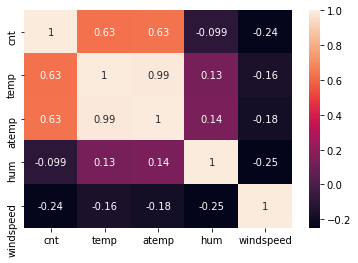

In [22]:
#checking relationship using heatmap
sns.heatmap(bikes[['cnt','temp','atemp','hum','windspeed']].corr(),annot=True)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

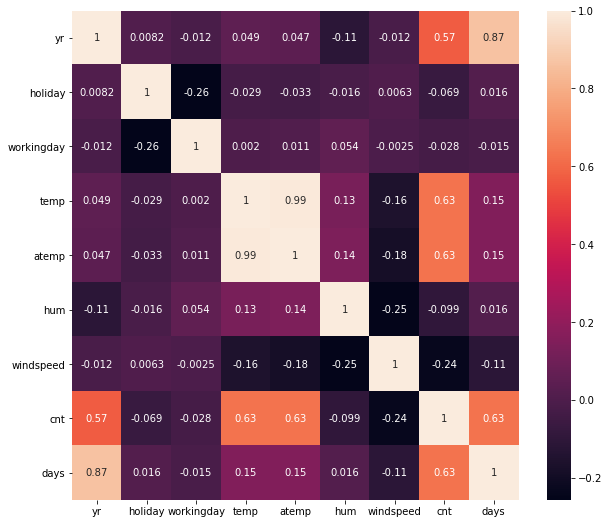

In [23]:
#checking correlation of num var
plt.figure(figsize=(10,9))
a=bikes.corr()
sns.heatmap(a,annot=True)
plt.show

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

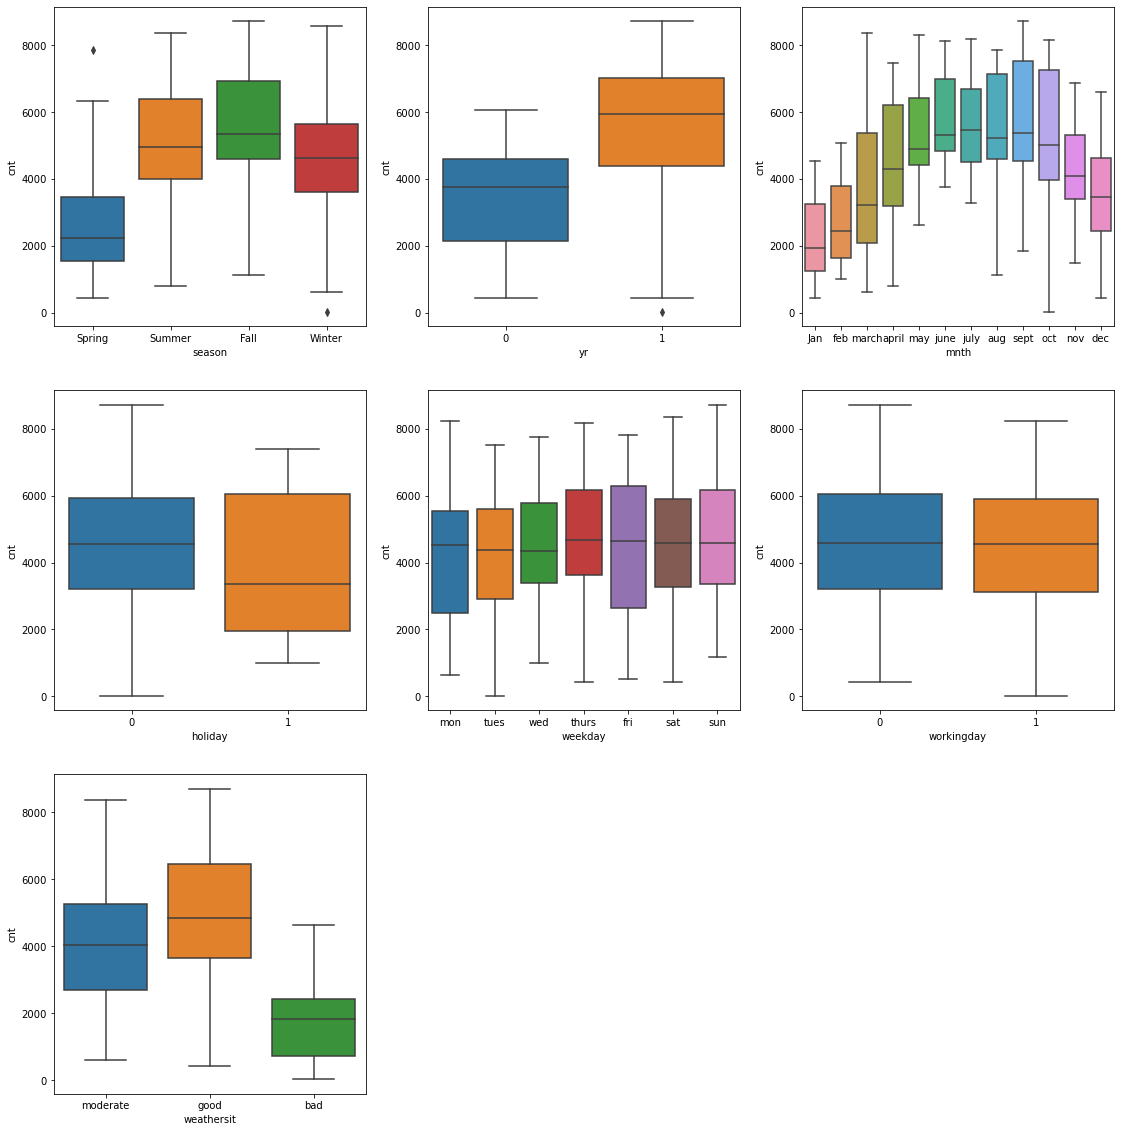

In [24]:
#boxplot for categorical var
plt.figure(figsize=(19,20))
plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt',data=bikes)
plt.subplot(3,3,2)
sns.boxplot(x='yr',y='cnt',data=bikes)
plt.subplot(3,3,3)
sns.boxplot(x='mnth',y='cnt',data=bikes)
plt.subplot(3,3,4)
sns.boxplot(x='holiday',y='cnt',data=bikes)
plt.subplot(3,3,5)
sns.boxplot(x='weekday',y='cnt',data=bikes)
plt.subplot(3,3,6)
sns.boxplot(x='workingday',y='cnt',data=bikes)
plt.subplot(3,3,7)
sns.boxplot(x='weathersit',y='cnt',data=bikes)

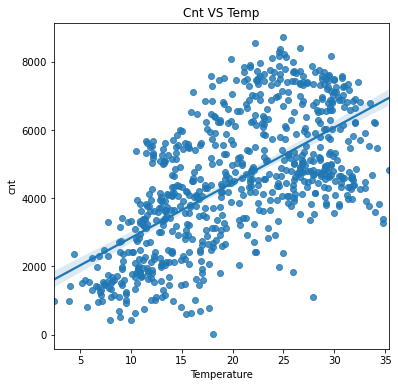

In [25]:
#cnt vs temp
plt.figure(figsize=(6,6))
plt.title('Cnt VS Temp')
sns.regplot(data=bikes,x='temp',y='cnt')
plt.xlabel('Temperature')
plt.show()

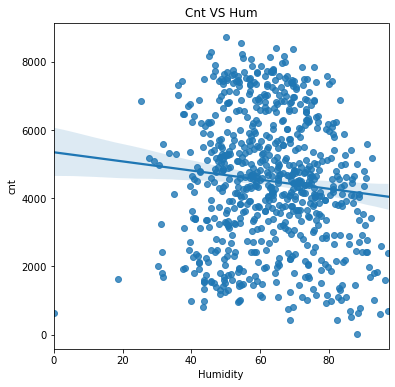

In [26]:
#cnt vs hum
plt.figure(figsize=(6,6))
plt.title('Cnt VS Hum')
sns.regplot(data=bikes,x='hum',y='cnt')
plt.xlabel('Humidity')
plt.show()

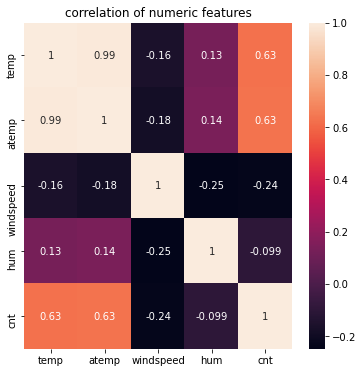

In [27]:
#correlation of num features using heatmap
features=['temp','atemp','windspeed','hum','cnt']
plt.figure(figsize=(6,6))
plt.title('correlation of numeric features')
sns.heatmap(bikes[features].corr(),annot=True)
plt.show()

## STEP-3 DATA PREPARATION FOR LINEAR REGRESSION

In [28]:
#creating dummy var
bikes=pd.get_dummies(data=bikes,columns=['season','mnth','weekday'],drop_first=True)
bikes=pd.get_dummies(data=bikes,columns=['weathersit'])

In [29]:
bikes.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'days', 'season_Spring', 'season_Summer', 'season_Winter',
       'mnth_april', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_july',
       'mnth_june', 'mnth_march', 'mnth_may', 'mnth_nov', 'mnth_oct',
       'mnth_sept', 'weekday_mon', 'weekday_sat', 'weekday_sun',
       'weekday_thurs', 'weekday_tues', 'weekday_wed', 'weathersit_bad',
       'weathersit_good', 'weathersit_moderate'],
      dtype='object')

In [30]:
bikes.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days,season_Spring,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thurs,weekday_tues,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,1,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,2,1,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,3,1,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,4,1,...,0,0,0,0,0,0,0,0,1,0


### MODEL BUILDING

In [31]:
#checking shape
bikes.shape

(730, 32)

In [32]:
#splitting to train and test set
y=bikes.pop('cnt')
x=bikes
x_train ,x_test, y_train ,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [33]:
x_train.shape

(511, 31)

In [34]:
x_test.shape

(219, 31)

In [35]:
#importing library
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [36]:
#continuous var
num=['temp','atemp','windspeed','hum','days']

In [37]:
#checking min max
scaler=MinMaxScaler()

In [38]:
x_train[num]=scaler.fit_transform(x_train[num])

In [39]:
#describing data
x_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days,season_Spring,season_Summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thurs,weekday_tues,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.00000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.520548,0.027397,0.698630,0.550874,0.526518,0.654174,0.414873,0.512409,0.230920,0.258317,...,0.09002,0.148728,0.142857,0.133072,0.135029,0.156556,0.133072,0.029354,0.624266,0.346380
std,0.500067,0.163398,0.459303,0.227231,0.212976,0.143648,0.185619,0.292268,0.421834,0.438138,...,0.28649,0.356169,0.350270,0.339986,0.342090,0.363738,0.339986,0.168963,0.484786,0.476282
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354221,0.353207,0.544598,0.281934,0.254458,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.575304,0.563297,0.659940,0.384732,0.521262,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.745079,0.698389,0.756977,0.526481,0.770233,0.000000,1.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
#building linear reg model
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [41]:
#using RFE to cut down features
rfe=RFE(lr,15)
rfe.fit(x_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [42]:
#adding a constant
def build_model(col):
    x_train_sm=sm.add_constant(x_train[col])
    lm=sm.OLS(y_train,x_train_sm).fit()
    print(lm.summary())
    return lm

In [43]:
#function to calculate vif
def get_vif(col):
    df1 = x_train[col]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [44]:
#cols selected by rfe
x_train.columns[rfe.support_]

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'days',
       'season_Spring', 'season_Winter', 'mnth_july', 'mnth_march', 'mnth_oct',
       'mnth_sept', 'weathersit_bad', 'weathersit_good'],
      dtype='object')

In [45]:
#cols not selected by rfe
x_train.columns[~rfe.support_]

Index(['workingday', 'season_Summer', 'mnth_april', 'mnth_aug', 'mnth_dec',
       'mnth_feb', 'mnth_june', 'mnth_may', 'mnth_nov', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thurs', 'weekday_tues',
       'weekday_wed', 'weathersit_moderate'],
      dtype='object')

In [46]:
#storing the cols supported by RFE 
x_train_rfe=x_train[['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'days',
       'season_Spring', 'season_Winter', 'mnth_july', 'mnth_march', 'mnth_oct',
       'mnth_sept', 'weathersit_bad', 'weathersit_good']]

In [47]:
x_train_rfe.shape

(511, 15)

### MODEL 1

In [48]:
#Vars selected by RFE
col=['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'days',
       'season_Spring', 'season_Winter', 'mnth_july', 'mnth_march', 'mnth_oct',
       'mnth_sept', 'weathersit_bad', 'weathersit_good']
build_model(col)
get_vif(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     174.6
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          1.37e-186
Time:                        10:22:19   Log-Likelihood:                -4122.7
No. Observations:                 511   AIC:                             8277.
Df Residuals:                     495   BIC:                             8345.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2861.7989    342.922     

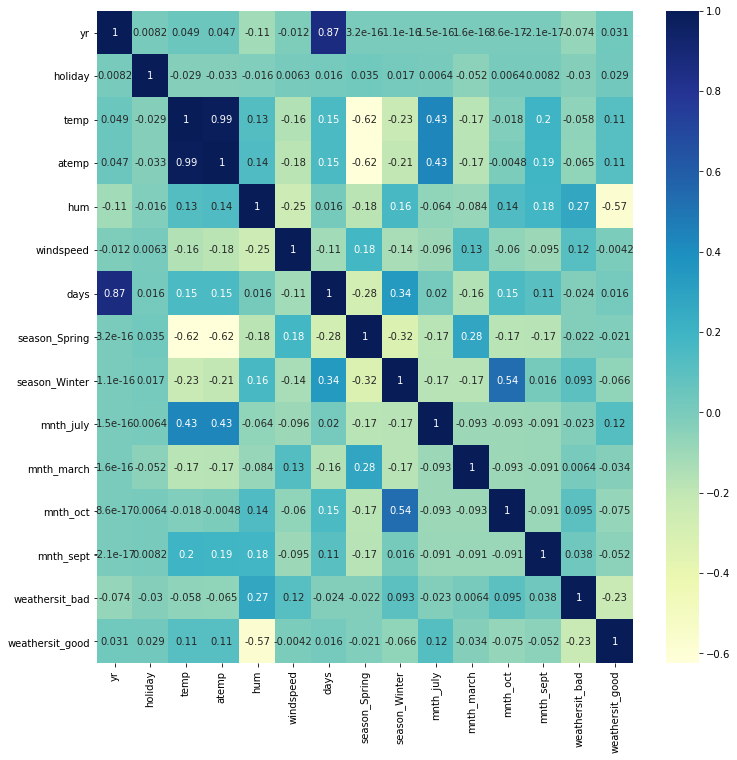

In [49]:
plt.figure(figsize=(12,12))
sns.heatmap(bikes[['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'days',
       'season_Spring', 'season_Winter', 'mnth_july', 'mnth_march', 'mnth_oct',
       'mnth_sept', 'weathersit_bad', 'weathersit_good']].corr(),annot=True,cmap='YlGnBu')
plt.show()

### MODEL 2

In [50]:
#dropping hum as it has negative coeffient
col=['yr', 'holiday', 'temp', 'atemp','windspeed', 'days',
       'season_Spring', 'season_Winter', 'mnth_july', 'mnth_march', 'mnth_oct',
       'mnth_sept', 'weathersit_bad', 'weathersit_good']
build_model(col)
get_vif(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     179.7
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          6.11e-184
Time:                        10:22:23   Log-Likelihood:                -4131.8
No. Observations:                 511   AIC:                             8294.
Df Residuals:                     496   BIC:                             8357.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1844.6760    248.206     

### MODEL 3

### Checking vif

In [51]:
#dropping temp as it  a high vif
col=['yr', 'holiday','atemp', 'windspeed', 'days',
       'season_Spring', 'season_Winter', 'mnth_july', 'mnth_march', 'mnth_oct',
       'mnth_sept', 'weathersit_bad', 'weathersit_good']
build_model(col)
get_vif(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     193.4
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          7.94e-185
Time:                        10:22:23   Log-Likelihood:                -4132.4
No. Observations:                 511   AIC:                             8293.
Df Residuals:                     497   BIC:                             8352.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1801.2710    245.161     

### MODEL 4

In [52]:
#dropping holiday as it was negative coeffient
col=['yr','atemp', 'windspeed', 'days',
       'season_Spring', 'season_Winter', 'mnth_july', 'mnth_march', 'mnth_oct',
       'mnth_sept', 'weathersit_bad', 'weathersit_good']
build_model(col)
get_vif(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     205.8
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          3.26e-184
Time:                        10:22:23   Log-Likelihood:                -4136.6
No. Observations:                 511   AIC:                             8299.
Df Residuals:                     498   BIC:                             8354.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1774.1413    246.768     

### MODEL 5

In [53]:
#dropping spring as it was negative coeffient
col=['yr','atemp', 'windspeed', 'days', 'season_Winter', 'mnth_july', 'mnth_march', 'mnth_oct',
       'mnth_sept', 'weathersit_bad', 'weathersit_good']
build_model(col)
get_vif(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     181.2
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          2.38e-166
Time:                        10:22:23   Log-Likelihood:                -4181.7
No. Observations:                 511   AIC:                             8387.
Df Residuals:                     499   BIC:                             8438.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              15.2151    184.913     

### MODEL 6

In [54]:
#dropping windspeed as it was negative coeffient
col=['yr','atemp', 'days', 'season_Winter', 'mnth_july', 'mnth_march', 'mnth_oct',
       'mnth_sept', 'weathersit_bad', 'weathersit_good']
build_model(col)
get_vif(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     197.4
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          1.66e-166
Time:                        10:22:23   Log-Likelihood:                -4184.1
No. Observations:                 511   AIC:                             8390.
Df Residuals:                     500   BIC:                             8437.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -239.1280    143.000     

### MODEL 7

In [55]:
#dropping july as it was negative coeffient
col=['yr','atemp', 'days', 'season_Winter', 'mnth_march', 'mnth_oct',
       'mnth_sept', 'weathersit_bad', 'weathersit_good']
build_model(col)
get_vif(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     212.5
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          8.81e-165
Time:                        10:22:23   Log-Likelihood:                -4191.0
No. Observations:                 511   AIC:                             8402.
Df Residuals:                     501   BIC:                             8444.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -100.3000    139.678     

In [56]:
#building model
def build_model_sk(x,y):
    lr1 = LinearRegression()
    lr1.fit(x,y)
    return lr1

In [57]:
#build final model
col=['yr','atemp', 'days', 'season_Winter', 'mnth_march', 'mnth_oct',
       'mnth_sept', 'weathersit_bad', 'weathersit_good']
lr=build_model_sk(x_train[col],y_train)
print(lr.intercept_,lr.coef_)

-100.30000940247464 [ 2298.16339621  5814.0183608   -667.20968921  1089.24532994
   345.47335497   352.8246638    717.09187225 -1535.92967108
   627.841467  ]


## STEP-5 MODEL EVALUATION

In [58]:
#Residual analysis
y_train_pred=lr.predict(x_train[col])

In [59]:
#plotting histogram
def plot_hist(act,pred):
    sns.distplot(act-pred)
    plt.title('Error terms')
    plt.xlabel('Error terms')

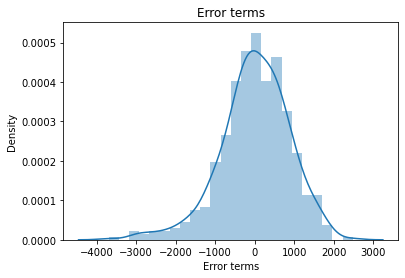

In [60]:
plot_hist(y_train,y_train_pred)

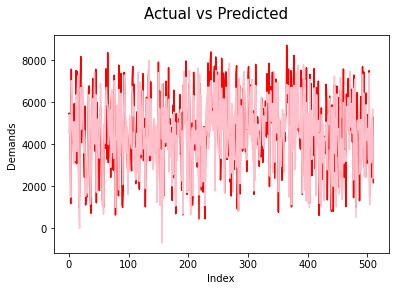

In [61]:
# Actual and Predicted
a = [i for i in range(0,len(x_train),1)]
plt.plot(a,y_train, color="red")
plt.plot(a,y_train_pred, color="pink")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

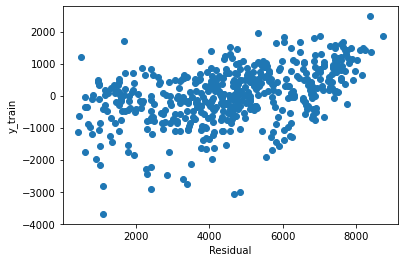

In [62]:
#scatter plot
resd=y_train-y_train_pred
plt.scatter(y_train,resd)
plt.xlabel('Residual')
plt.ylabel('y_train')
plt.show()

In [63]:
#predict test dataset
num=['temp','atemp','hum','windspeed','days']
x_test[num]=scaler.transform(x_test[num])

In [64]:
col=['yr','atemp', 'days', 'season_Winter', 'mnth_march', 'mnth_oct',
       'mnth_sept', 'weathersit_bad','weathersit_good']
y_test_pred=lr.predict(x_test[col])

In [65]:
#checking r squared val for test
r2_score(y_test,y_test_pred)

0.7692001429136691

In [66]:
#checking r squared for train
r2_score(y_train,y_train_pred)

0.7924228974232925

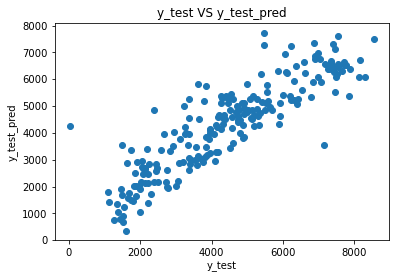

In [69]:
#scatter plot
plt.scatter(y_test,y_test_pred)
plt.title('y_test VS y_test_pred')
plt.xlabel('y_test')
plt.ylabel('y_test_pred')
plt.show()

### MAKING PREDICTIONS

In [71]:
#checking data
bikes.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days,season_Spring,season_Summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thurs,weekday_tues,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,0,1,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,1,1,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,2,1,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,3,1,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,4,1,0,...,0,0,0,0,0,0,0,0,1,0


In [74]:
#building final model
col=['yr','atemp', 'days', 'season_Winter', 'mnth_march', 'mnth_oct',
       'mnth_sept', 'weathersit_bad', 'weathersit_good']
build_model(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     212.5
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          8.81e-165
Time:                        10:34:09   Log-Likelihood:                -4191.0
No. Observations:                 511   AIC:                             8402.
Df Residuals:                     501   BIC:                             8444.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -100.3000    139.678     